In [1]:
import pandas as pd
import numpy as np
import datetime


In [2]:
train = pd.read_csv('./output/train.csv')    
test = pd.read_csv('./output/test.csv')    
test2 = pd.read_csv('./output/test2.csv')

def within_measure(x, y):
    #  3750901.5068 ≤ 𝑥 ≤ 3770901.5068
    #  −19268905.6133 ≤ 𝑦 ≤ −19208905.6133
    if 3750901.5068 <= x and x <= 3770901.5068 and -19268905.6133 <= y and y <= -19208905.6133:
        return 1
    else:
        return 0

    
train = train.append(test[test.x_exit==test.x_exit])
columns=[#'hash', 'trajectory_id', 
         'time_entry', 'time_exit', 'vmax', 'vmin',
       'vmean', 'x_entry', 'y_entry', 'first', 'last',
       'x_req', 'y_req', 'x_start', 'y_start', 'distance', 'time_start',
       'time_delta', 'time_total', 'city_start', 'city_now', 'city_was',
       'x_dir', 'y_dir', 'len',
         'distance_to_city', 'speed',
    #'x_exit', 'y_exit', 
        ]
x_train = train[columns]
x_test = test2[columns]


y_train=pd.DataFrame()
#y_train=train[['x_exit','y_exit']]
y_train=[within_measure(x, y) for x,y in zip(train.x_exit.values,train.y_exit.values)]
y_train=pd.DataFrame({'y':y_train})

In [3]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983684 entries, 0 to 202935
Data columns (total 25 columns):
time_entry          983684 non-null int64
time_exit           983684 non-null int64
vmax                311474 non-null float64
vmin                311474 non-null float64
vmean               328137 non-null float64
x_entry             983684 non-null float64
y_entry             983684 non-null float64
first               983684 non-null bool
last                983684 non-null bool
x_req               983684 non-null float64
y_req               983684 non-null float64
x_start             983684 non-null float64
y_start             983684 non-null float64
distance            983684 non-null float64
time_start          983684 non-null int64
time_delta          983684 non-null int64
time_total          983684 non-null int64
city_start          983684 non-null bool
city_now            983684 non-null bool
city_was            983684 non-null bool
x_dir               983684 non-nul

In [4]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983684 entries, 0 to 983683
Data columns (total 1 columns):
y    983684 non-null int64
dtypes: int64(1)
memory usage: 7.5 MB


In [12]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import matplotlib.patches as patches


columns=['distance', 'time_start',
       'time_delta', 'time_total', 'city_start', 'city_now', 'city_was',
        'len']
data=train[columns]
trainend=np.shape(data)[0]
#data=data.append(test[columns])
#testend=np.shape(data)[0]
data=data.append(test2[columns])



c=MiniBatchKMeans(n_clusters=8,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315).fit_predict(data)

labels=list(np.unique(c))
clusters=len(labels)
train_c=c[:trainend]
#test_c=c[trainend:testend]
test2_c=c[trainend:]
x_train['cluster']=train_c
x_test['cluster']=test2_c




Init 1/3 with method: k-means++
Inertia for init 1/3: 2720810577491.831543
Init 2/3 with method: k-means++
Inertia for init 2/3: 2749387098641.942383
Init 3/3 with method: k-means++
Inertia for init 3/3: 2883027488684.082520
Minibatch iteration 1/101800: mean batch inertia: 890709850.980526, ewa inertia: 890709850.980526 
Minibatch iteration 2/101800: mean batch inertia: 780749409.580907, ewa inertia: 890493648.775650 
Minibatch iteration 3/101800: mean batch inertia: 728718721.148525, ewa inertia: 890175569.877445 
Minibatch iteration 4/101800: mean batch inertia: 789655671.343756, ewa inertia: 889977929.494956 
Minibatch iteration 5/101800: mean batch inertia: 774911208.323420, ewa inertia: 889751687.416365 
Minibatch iteration 6/101800: mean batch inertia: 746093443.719732, ewa inertia: 889469229.210119 
Minibatch iteration 7/101800: mean batch inertia: 709454952.845855, ewa inertia: 889115288.438660 
Minibatch iteration 8/101800: mean batch inertia: 776364753.545484, ewa inertia: 8

Minibatch iteration 121/101800: mean batch inertia: 747487300.455924, ewa inertia: 863745991.771382 
Minibatch iteration 122/101800: mean batch inertia: 1073404322.673280, ewa inertia: 864158218.139652 
Minibatch iteration 123/101800: mean batch inertia: 765902364.346661, ewa inertia: 863965029.280444 
Minibatch iteration 124/101800: mean batch inertia: 839654270.090552, ewa inertia: 863917229.911215 
Minibatch iteration 125/101800: mean batch inertia: 704052178.168456, ewa inertia: 863602906.175976 
Minibatch iteration 126/101800: mean batch inertia: 757652972.124630, ewa inertia: 863394589.357157 
Minibatch iteration 127/101800: mean batch inertia: 715532860.588389, ewa inertia: 863103866.335590 
Minibatch iteration 128/101800: mean batch inertia: 741025450.533310, ewa inertia: 862863837.991504 
Minibatch iteration 129/101800: mean batch inertia: 690184311.374292, ewa inertia: 862524318.670589 
Minibatch iteration 130/101800: mean batch inertia: 836178686.891613, ewa inertia: 8624725

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


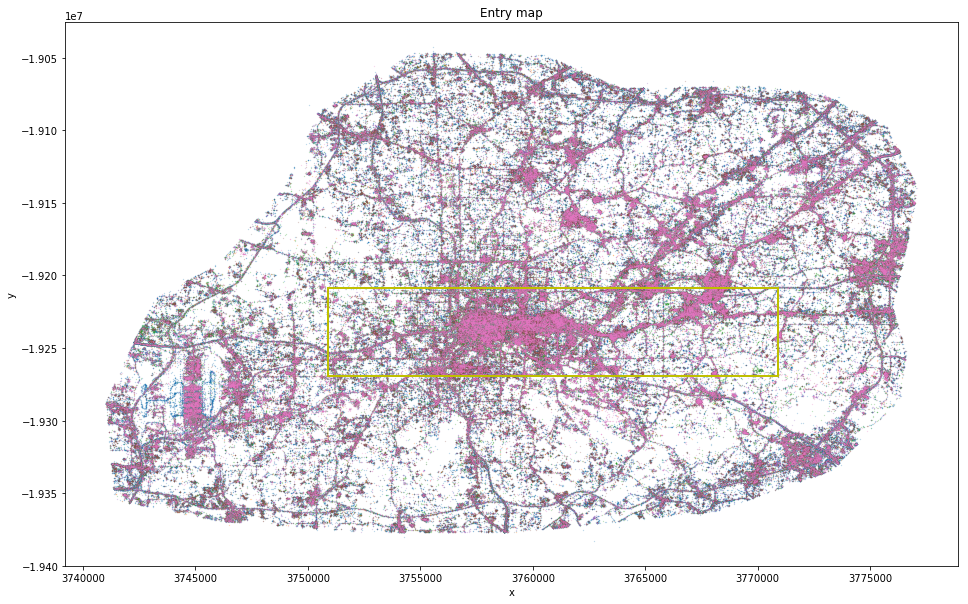

In [13]:
data=train[['x_entry','y_entry']]
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()


D:\Anaconda\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[1]	valid's binary_logloss: 0.603144	valid's f1: 0
[2]	valid's binary_logloss: 0.596726	valid's f1: 0
[3]	valid's binary_logloss: 0.59044	valid's f1: 0
[4]	valid's binary_logloss: 0.58428	valid's f1: 0
[5]	valid's binary_logloss: 0.57824	valid's f1: 0
[6]	valid's binary_logloss: 0.572331	valid's f1: 0
[7]	valid's binary_logloss: 0.566532	valid's f1: 0
[8]	valid's binary_logloss: 0.560847	valid's f1: 0
[9]	valid's binary_logloss: 0.55527	valid's f1: 0
[10]	valid's binary_logloss: 0.549797	valid's f1: 0
[11]	valid's binary_logloss: 0.544427	valid's f1: 0
[12]	valid's binary_logloss: 0.539156	valid's f1: 0
[13]	valid's binary_logloss: 0.533988	valid's f1: 0
[14]	valid's binary_logloss: 0.528903	valid's f1: 0
[15]	valid's binary_logloss: 0.523916	valid's f1: 0
[16]	valid's binary_logloss: 0.519013	valid's f1: 0
[17]	valid's binary_logloss: 0.514196	valid's f1: 0
[18]	valid's binary_logloss: 0.509461	valid's f1: 0
[19]	valid's binary_logloss: 0.504807	valid's f1: 0
[20]	valid's binary_loglo

[145]	valid's binary_logloss: 0.224239	valid's f1: 0.914049
[146]	valid's binary_logloss: 0.223227	valid's f1: 0.91409
[147]	valid's binary_logloss: 0.222224	valid's f1: 0.914084
[148]	valid's binary_logloss: 0.221227	valid's f1: 0.914187
[149]	valid's binary_logloss: 0.220243	valid's f1: 0.914148
[150]	valid's binary_logloss: 0.219265	valid's f1: 0.914145
[151]	valid's binary_logloss: 0.218301	valid's f1: 0.914223
[152]	valid's binary_logloss: 0.217346	valid's f1: 0.91433
[153]	valid's binary_logloss: 0.216397	valid's f1: 0.914337
[154]	valid's binary_logloss: 0.215464	valid's f1: 0.914411
[155]	valid's binary_logloss: 0.214536	valid's f1: 0.91438
[156]	valid's binary_logloss: 0.213618	valid's f1: 0.914405
[157]	valid's binary_logloss: 0.212706	valid's f1: 0.914527
[158]	valid's binary_logloss: 0.211806	valid's f1: 0.914504
[159]	valid's binary_logloss: 0.210916	valid's f1: 0.914771
[160]	valid's binary_logloss: 0.210034	valid's f1: 0.914896
[161]	valid's binary_logloss: 0.209158	vali

[283]	valid's binary_logloss: 0.14504	valid's f1: 0.918133
[284]	valid's binary_logloss: 0.144743	valid's f1: 0.918135
[285]	valid's binary_logloss: 0.144448	valid's f1: 0.918122
[286]	valid's binary_logloss: 0.144165	valid's f1: 0.918132
[287]	valid's binary_logloss: 0.143882	valid's f1: 0.918122
[288]	valid's binary_logloss: 0.143609	valid's f1: 0.918108
[289]	valid's binary_logloss: 0.14332	valid's f1: 0.918101
[290]	valid's binary_logloss: 0.143046	valid's f1: 0.918093
[291]	valid's binary_logloss: 0.142766	valid's f1: 0.918082
[292]	valid's binary_logloss: 0.142497	valid's f1: 0.918084
[293]	valid's binary_logloss: 0.142226	valid's f1: 0.918117
[294]	valid's binary_logloss: 0.141963	valid's f1: 0.918131
[295]	valid's binary_logloss: 0.141706	valid's f1: 0.918104
[296]	valid's binary_logloss: 0.141438	valid's f1: 0.918131
[297]	valid's binary_logloss: 0.141184	valid's f1: 0.918112
[298]	valid's binary_logloss: 0.140922	valid's f1: 0.918128
[299]	valid's binary_logloss: 0.140669	val

[421]	valid's binary_logloss: 0.121183	valid's f1: 0.919046
[422]	valid's binary_logloss: 0.121089	valid's f1: 0.919138
[423]	valid's binary_logloss: 0.120998	valid's f1: 0.919111
[424]	valid's binary_logloss: 0.120906	valid's f1: 0.919138
[425]	valid's binary_logloss: 0.120816	valid's f1: 0.919144
[426]	valid's binary_logloss: 0.120723	valid's f1: 0.919218
[427]	valid's binary_logloss: 0.120634	valid's f1: 0.919152
[428]	valid's binary_logloss: 0.120535	valid's f1: 0.919121
[429]	valid's binary_logloss: 0.120446	valid's f1: 0.919097
[430]	valid's binary_logloss: 0.120355	valid's f1: 0.919136
[431]	valid's binary_logloss: 0.120266	valid's f1: 0.919119
[432]	valid's binary_logloss: 0.120181	valid's f1: 0.919083
[433]	valid's binary_logloss: 0.120094	valid's f1: 0.919056
[434]	valid's binary_logloss: 0.120008	valid's f1: 0.919083
[435]	valid's binary_logloss: 0.119926	valid's f1: 0.919081
[436]	valid's binary_logloss: 0.119845	valid's f1: 0.919114
[437]	valid's binary_logloss: 0.119764	v

[558]	valid's binary_logloss: 0.11306	valid's f1: 0.919657
[559]	valid's binary_logloss: 0.113023	valid's f1: 0.919659
[560]	valid's binary_logloss: 0.112985	valid's f1: 0.919668
[561]	valid's binary_logloss: 0.112954	valid's f1: 0.91967
[562]	valid's binary_logloss: 0.112925	valid's f1: 0.919642
[563]	valid's binary_logloss: 0.112889	valid's f1: 0.919688
[564]	valid's binary_logloss: 0.112856	valid's f1: 0.919696
[565]	valid's binary_logloss: 0.112826	valid's f1: 0.919712
[566]	valid's binary_logloss: 0.112792	valid's f1: 0.919719
[567]	valid's binary_logloss: 0.112761	valid's f1: 0.919718
[568]	valid's binary_logloss: 0.112732	valid's f1: 0.919662
[569]	valid's binary_logloss: 0.112704	valid's f1: 0.919707
[570]	valid's binary_logloss: 0.112675	valid's f1: 0.919744
[571]	valid's binary_logloss: 0.112646	valid's f1: 0.919719
[572]	valid's binary_logloss: 0.11262	valid's f1: 0.919771
[573]	valid's binary_logloss: 0.112591	valid's f1: 0.919788
[574]	valid's binary_logloss: 0.112562	vali

[696]	valid's binary_logloss: 0.110048	valid's f1: 0.920073
[697]	valid's binary_logloss: 0.110031	valid's f1: 0.920092
[698]	valid's binary_logloss: 0.110011	valid's f1: 0.920076
[699]	valid's binary_logloss: 0.109996	valid's f1: 0.920066
[700]	valid's binary_logloss: 0.109985	valid's f1: 0.919986
[701]	valid's binary_logloss: 0.10997	valid's f1: 0.919979
[702]	valid's binary_logloss: 0.10995	valid's f1: 0.919963
[703]	valid's binary_logloss: 0.109936	valid's f1: 0.919989
[704]	valid's binary_logloss: 0.109924	valid's f1: 0.919964
[705]	valid's binary_logloss: 0.10991	valid's f1: 0.919939
[706]	valid's binary_logloss: 0.109899	valid's f1: 0.919916
[707]	valid's binary_logloss: 0.109886	valid's f1: 0.919949
[708]	valid's binary_logloss: 0.109869	valid's f1: 0.919959
[709]	valid's binary_logloss: 0.109856	valid's f1: 0.919951
[710]	valid's binary_logloss: 0.109837	valid's f1: 0.919967
[711]	valid's binary_logloss: 0.109825	valid's f1: 0.919948
[712]	valid's binary_logloss: 0.109804	vali

[39]	valid's binary_logloss: 0.427201	valid's f1: 0
[40]	valid's binary_logloss: 0.423815	valid's f1: 0
[41]	valid's binary_logloss: 0.420482	valid's f1: 0
[42]	valid's binary_logloss: 0.417191	valid's f1: 0.69365
[43]	valid's binary_logloss: 0.413946	valid's f1: 0.693737
[44]	valid's binary_logloss: 0.410751	valid's f1: 0.762791
[45]	valid's binary_logloss: 0.407595	valid's f1: 0.782814
[46]	valid's binary_logloss: 0.404484	valid's f1: 0.811865
[47]	valid's binary_logloss: 0.401415	valid's f1: 0.826154
[48]	valid's binary_logloss: 0.398386	valid's f1: 0.83573
[49]	valid's binary_logloss: 0.395394	valid's f1: 0.842807
[50]	valid's binary_logloss: 0.392443	valid's f1: 0.849143
[51]	valid's binary_logloss: 0.38953	valid's f1: 0.855229
[52]	valid's binary_logloss: 0.386656	valid's f1: 0.860292
[53]	valid's binary_logloss: 0.383819	valid's f1: 0.863787
[54]	valid's binary_logloss: 0.381017	valid's f1: 0.866854
[55]	valid's binary_logloss: 0.378252	valid's f1: 0.870238
[56]	valid's binary_l

[178]	valid's binary_logloss: 0.196141	valid's f1: 0.916178
[179]	valid's binary_logloss: 0.195393	valid's f1: 0.916235
[180]	valid's binary_logloss: 0.194656	valid's f1: 0.916266
[181]	valid's binary_logloss: 0.193928	valid's f1: 0.91633
[182]	valid's binary_logloss: 0.193206	valid's f1: 0.916339
[183]	valid's binary_logloss: 0.19249	valid's f1: 0.91633
[184]	valid's binary_logloss: 0.191781	valid's f1: 0.916348
[185]	valid's binary_logloss: 0.191076	valid's f1: 0.916331
[186]	valid's binary_logloss: 0.190383	valid's f1: 0.916398
[187]	valid's binary_logloss: 0.189697	valid's f1: 0.916407
[188]	valid's binary_logloss: 0.189019	valid's f1: 0.916374
[189]	valid's binary_logloss: 0.188346	valid's f1: 0.916377
[190]	valid's binary_logloss: 0.187682	valid's f1: 0.916415
[191]	valid's binary_logloss: 0.187021	valid's f1: 0.9164
[192]	valid's binary_logloss: 0.186365	valid's f1: 0.916409
[193]	valid's binary_logloss: 0.185715	valid's f1: 0.916482
[194]	valid's binary_logloss: 0.185071	valid'

[316]	valid's binary_logloss: 0.137551	valid's f1: 0.918565
[317]	valid's binary_logloss: 0.137327	valid's f1: 0.918605
[318]	valid's binary_logloss: 0.137104	valid's f1: 0.918631
[319]	valid's binary_logloss: 0.136882	valid's f1: 0.918677
[320]	valid's binary_logloss: 0.136668	valid's f1: 0.91867
[321]	valid's binary_logloss: 0.136453	valid's f1: 0.918672
[322]	valid's binary_logloss: 0.136241	valid's f1: 0.918683
[323]	valid's binary_logloss: 0.136032	valid's f1: 0.918706
[324]	valid's binary_logloss: 0.135822	valid's f1: 0.918687
[325]	valid's binary_logloss: 0.135615	valid's f1: 0.918702
[326]	valid's binary_logloss: 0.135408	valid's f1: 0.91871
[327]	valid's binary_logloss: 0.135204	valid's f1: 0.918699
[328]	valid's binary_logloss: 0.135	valid's f1: 0.918746
[329]	valid's binary_logloss: 0.134798	valid's f1: 0.918738
[330]	valid's binary_logloss: 0.134598	valid's f1: 0.918787
[331]	valid's binary_logloss: 0.134399	valid's f1: 0.918701
[332]	valid's binary_logloss: 0.134203	valid'

[453]	valid's binary_logloss: 0.119377	valid's f1: 0.919398
[454]	valid's binary_logloss: 0.119306	valid's f1: 0.919423
[455]	valid's binary_logloss: 0.119231	valid's f1: 0.919399
[456]	valid's binary_logloss: 0.119163	valid's f1: 0.919381
[457]	valid's binary_logloss: 0.119089	valid's f1: 0.919419
[458]	valid's binary_logloss: 0.119012	valid's f1: 0.919423
[459]	valid's binary_logloss: 0.118946	valid's f1: 0.919425
[460]	valid's binary_logloss: 0.118876	valid's f1: 0.91944
[461]	valid's binary_logloss: 0.118805	valid's f1: 0.919493
[462]	valid's binary_logloss: 0.118734	valid's f1: 0.919518
[463]	valid's binary_logloss: 0.118668	valid's f1: 0.919526
[464]	valid's binary_logloss: 0.118597	valid's f1: 0.919509
[465]	valid's binary_logloss: 0.118532	valid's f1: 0.919492
[466]	valid's binary_logloss: 0.11846	valid's f1: 0.919493
[467]	valid's binary_logloss: 0.118398	valid's f1: 0.919534
[468]	valid's binary_logloss: 0.118329	valid's f1: 0.91956
[469]	valid's binary_logloss: 0.118259	vali

[590]	valid's binary_logloss: 0.113046	valid's f1: 0.920165
[591]	valid's binary_logloss: 0.113013	valid's f1: 0.920132
[592]	valid's binary_logloss: 0.112989	valid's f1: 0.920106
[593]	valid's binary_logloss: 0.112966	valid's f1: 0.920139
[594]	valid's binary_logloss: 0.112939	valid's f1: 0.920131
[595]	valid's binary_logloss: 0.112914	valid's f1: 0.92013
[596]	valid's binary_logloss: 0.112888	valid's f1: 0.920118
[597]	valid's binary_logloss: 0.11286	valid's f1: 0.920166
[598]	valid's binary_logloss: 0.112835	valid's f1: 0.920158
[599]	valid's binary_logloss: 0.112806	valid's f1: 0.920177
[600]	valid's binary_logloss: 0.11278	valid's f1: 0.920148
[601]	valid's binary_logloss: 0.112758	valid's f1: 0.920148
[602]	valid's binary_logloss: 0.112727	valid's f1: 0.920178
[603]	valid's binary_logloss: 0.112704	valid's f1: 0.920194
[604]	valid's binary_logloss: 0.112672	valid's f1: 0.920203
[605]	valid's binary_logloss: 0.11265	valid's f1: 0.920203
[606]	valid's binary_logloss: 0.112619	valid

[728]	valid's binary_logloss: 0.110371	valid's f1: 0.920644
[729]	valid's binary_logloss: 0.110362	valid's f1: 0.920678
[730]	valid's binary_logloss: 0.11035	valid's f1: 0.920623
[731]	valid's binary_logloss: 0.110339	valid's f1: 0.92063
[732]	valid's binary_logloss: 0.110327	valid's f1: 0.920653
[733]	valid's binary_logloss: 0.110315	valid's f1: 0.920646
[734]	valid's binary_logloss: 0.11031	valid's f1: 0.920663
[735]	valid's binary_logloss: 0.110298	valid's f1: 0.920653
[736]	valid's binary_logloss: 0.110288	valid's f1: 0.920661
[737]	valid's binary_logloss: 0.110276	valid's f1: 0.920641
[738]	valid's binary_logloss: 0.11027	valid's f1: 0.920631
[739]	valid's binary_logloss: 0.110259	valid's f1: 0.92064
[740]	valid's binary_logloss: 0.110252	valid's f1: 0.920652
[741]	valid's binary_logloss: 0.110236	valid's f1: 0.920676
[742]	valid's binary_logloss: 0.11023	valid's f1: 0.920636
[743]	valid's binary_logloss: 0.110215	valid's f1: 0.920705
[744]	valid's binary_logloss: 0.110211	valid's

[72]	valid's binary_logloss: 0.334723	valid's f1: 0.895329
[73]	valid's binary_logloss: 0.33252	valid's f1: 0.896059
[74]	valid's binary_logloss: 0.330343	valid's f1: 0.896829
[75]	valid's binary_logloss: 0.328193	valid's f1: 0.897648
[76]	valid's binary_logloss: 0.326071	valid's f1: 0.898314
[77]	valid's binary_logloss: 0.323969	valid's f1: 0.899016
[78]	valid's binary_logloss: 0.321894	valid's f1: 0.899632
[79]	valid's binary_logloss: 0.319842	valid's f1: 0.900161
[80]	valid's binary_logloss: 0.317817	valid's f1: 0.900754
[81]	valid's binary_logloss: 0.31581	valid's f1: 0.901227
[82]	valid's binary_logloss: 0.313826	valid's f1: 0.901848
[83]	valid's binary_logloss: 0.31187	valid's f1: 0.902358
[84]	valid's binary_logloss: 0.309926	valid's f1: 0.902725
[85]	valid's binary_logloss: 0.308007	valid's f1: 0.90307
[86]	valid's binary_logloss: 0.30611	valid's f1: 0.903553
[87]	valid's binary_logloss: 0.304238	valid's f1: 0.903925
[88]	valid's binary_logloss: 0.302388	valid's f1: 0.904225
[8

[210]	valid's binary_logloss: 0.174234	valid's f1: 0.91787
[211]	valid's binary_logloss: 0.173686	valid's f1: 0.917982
[212]	valid's binary_logloss: 0.173142	valid's f1: 0.917963
[213]	valid's binary_logloss: 0.172605	valid's f1: 0.91798
[214]	valid's binary_logloss: 0.172075	valid's f1: 0.918073
[215]	valid's binary_logloss: 0.171546	valid's f1: 0.918021
[216]	valid's binary_logloss: 0.171022	valid's f1: 0.918079
[217]	valid's binary_logloss: 0.170502	valid's f1: 0.918134
[218]	valid's binary_logloss: 0.169992	valid's f1: 0.918097
[219]	valid's binary_logloss: 0.169481	valid's f1: 0.918095
[220]	valid's binary_logloss: 0.16897	valid's f1: 0.918154
[221]	valid's binary_logloss: 0.168468	valid's f1: 0.918197
[222]	valid's binary_logloss: 0.167968	valid's f1: 0.91819
[223]	valid's binary_logloss: 0.167474	valid's f1: 0.918231
[224]	valid's binary_logloss: 0.166983	valid's f1: 0.91829
[225]	valid's binary_logloss: 0.166498	valid's f1: 0.918322
[226]	valid's binary_logloss: 0.166019	valid'

[348]	valid's binary_logloss: 0.129826	valid's f1: 0.919377
[349]	valid's binary_logloss: 0.129655	valid's f1: 0.919363
[350]	valid's binary_logloss: 0.129482	valid's f1: 0.919364
[351]	valid's binary_logloss: 0.129316	valid's f1: 0.919347
[352]	valid's binary_logloss: 0.129151	valid's f1: 0.91935
[353]	valid's binary_logloss: 0.128989	valid's f1: 0.919399
[354]	valid's binary_logloss: 0.128824	valid's f1: 0.919474
[355]	valid's binary_logloss: 0.128659	valid's f1: 0.919483
[356]	valid's binary_logloss: 0.128501	valid's f1: 0.919529
[357]	valid's binary_logloss: 0.128338	valid's f1: 0.919538
[358]	valid's binary_logloss: 0.128178	valid's f1: 0.919573
[359]	valid's binary_logloss: 0.128017	valid's f1: 0.919547
[360]	valid's binary_logloss: 0.12786	valid's f1: 0.919558
[361]	valid's binary_logloss: 0.127701	valid's f1: 0.919539
[362]	valid's binary_logloss: 0.127547	valid's f1: 0.919554
[363]	valid's binary_logloss: 0.127393	valid's f1: 0.919565
[364]	valid's binary_logloss: 0.127246	val

[486]	valid's binary_logloss: 0.115515	valid's f1: 0.920426
[487]	valid's binary_logloss: 0.115461	valid's f1: 0.920432
[488]	valid's binary_logloss: 0.115408	valid's f1: 0.920487
[489]	valid's binary_logloss: 0.115344	valid's f1: 0.920479
[490]	valid's binary_logloss: 0.115281	valid's f1: 0.920487
[491]	valid's binary_logloss: 0.115229	valid's f1: 0.920423
[492]	valid's binary_logloss: 0.115177	valid's f1: 0.920403
[493]	valid's binary_logloss: 0.115123	valid's f1: 0.920422
[494]	valid's binary_logloss: 0.115061	valid's f1: 0.920426
[495]	valid's binary_logloss: 0.115008	valid's f1: 0.920443
[496]	valid's binary_logloss: 0.114959	valid's f1: 0.920423
[497]	valid's binary_logloss: 0.1149	valid's f1: 0.920431
[498]	valid's binary_logloss: 0.114839	valid's f1: 0.920345
[499]	valid's binary_logloss: 0.114794	valid's f1: 0.920366
[500]	valid's binary_logloss: 0.114745	valid's f1: 0.920424
[501]	valid's binary_logloss: 0.114694	valid's f1: 0.920452
[502]	valid's binary_logloss: 0.114634	val

[623]	valid's binary_logloss: 0.110403	valid's f1: 0.921247
[624]	valid's binary_logloss: 0.110383	valid's f1: 0.921222
[625]	valid's binary_logloss: 0.110363	valid's f1: 0.921193
[626]	valid's binary_logloss: 0.110343	valid's f1: 0.921191
[627]	valid's binary_logloss: 0.110323	valid's f1: 0.921221
[628]	valid's binary_logloss: 0.110304	valid's f1: 0.921161
[629]	valid's binary_logloss: 0.110284	valid's f1: 0.921161
[630]	valid's binary_logloss: 0.110265	valid's f1: 0.921173
[631]	valid's binary_logloss: 0.110244	valid's f1: 0.921153
[632]	valid's binary_logloss: 0.110223	valid's f1: 0.921259
[633]	valid's binary_logloss: 0.110203	valid's f1: 0.921249
[634]	valid's binary_logloss: 0.110185	valid's f1: 0.921269
[635]	valid's binary_logloss: 0.110162	valid's f1: 0.921226
[636]	valid's binary_logloss: 0.110144	valid's f1: 0.921179
[637]	valid's binary_logloss: 0.110122	valid's f1: 0.921199
[638]	valid's binary_logloss: 0.110105	valid's f1: 0.921219
[639]	valid's binary_logloss: 0.110084	v

[760]	valid's binary_logloss: 0.108266	valid's f1: 0.921719
[761]	valid's binary_logloss: 0.108258	valid's f1: 0.921702
[762]	valid's binary_logloss: 0.108254	valid's f1: 0.921697
[763]	valid's binary_logloss: 0.108242	valid's f1: 0.921697
[764]	valid's binary_logloss: 0.108235	valid's f1: 0.921706
[765]	valid's binary_logloss: 0.10823	valid's f1: 0.921683
[766]	valid's binary_logloss: 0.108222	valid's f1: 0.921702
[767]	valid's binary_logloss: 0.108216	valid's f1: 0.921703
[768]	valid's binary_logloss: 0.10821	valid's f1: 0.92171
[769]	valid's binary_logloss: 0.1082	valid's f1: 0.92176
[770]	valid's binary_logloss: 0.108195	valid's f1: 0.921735
[771]	valid's binary_logloss: 0.108184	valid's f1: 0.921725
[772]	valid's binary_logloss: 0.108178	valid's f1: 0.921733
[773]	valid's binary_logloss: 0.108169	valid's f1: 0.921706
[774]	valid's binary_logloss: 0.108158	valid's f1: 0.921691
[775]	valid's binary_logloss: 0.108151	valid's f1: 0.921699
[776]	valid's binary_logloss: 0.108145	valid's

[104]	valid's binary_logloss: 0.275267	valid's f1: 0.910488
[105]	valid's binary_logloss: 0.273728	valid's f1: 0.910694
[106]	valid's binary_logloss: 0.272207	valid's f1: 0.910782
[107]	valid's binary_logloss: 0.270702	valid's f1: 0.911043
[108]	valid's binary_logloss: 0.269211	valid's f1: 0.911162
[109]	valid's binary_logloss: 0.267736	valid's f1: 0.911328
[110]	valid's binary_logloss: 0.266277	valid's f1: 0.911499
[111]	valid's binary_logloss: 0.264831	valid's f1: 0.911686
[112]	valid's binary_logloss: 0.263401	valid's f1: 0.911827
[113]	valid's binary_logloss: 0.261987	valid's f1: 0.912048
[114]	valid's binary_logloss: 0.26059	valid's f1: 0.912289
[115]	valid's binary_logloss: 0.259206	valid's f1: 0.912424
[116]	valid's binary_logloss: 0.257835	valid's f1: 0.912603
[117]	valid's binary_logloss: 0.256479	valid's f1: 0.912658
[118]	valid's binary_logloss: 0.255139	valid's f1: 0.912757
[119]	valid's binary_logloss: 0.25381	valid's f1: 0.912765
[120]	valid's binary_logloss: 0.252494	val

[241]	valid's binary_logloss: 0.159161	valid's f1: 0.918272
[242]	valid's binary_logloss: 0.158736	valid's f1: 0.918208
[243]	valid's binary_logloss: 0.158322	valid's f1: 0.91824
[244]	valid's binary_logloss: 0.157911	valid's f1: 0.918257
[245]	valid's binary_logloss: 0.157502	valid's f1: 0.918226
[246]	valid's binary_logloss: 0.157102	valid's f1: 0.918241
[247]	valid's binary_logloss: 0.156698	valid's f1: 0.918263
[248]	valid's binary_logloss: 0.156304	valid's f1: 0.918305
[249]	valid's binary_logloss: 0.155906	valid's f1: 0.918353
[250]	valid's binary_logloss: 0.15552	valid's f1: 0.918414
[251]	valid's binary_logloss: 0.155129	valid's f1: 0.918417
[252]	valid's binary_logloss: 0.15475	valid's f1: 0.918396
[253]	valid's binary_logloss: 0.154372	valid's f1: 0.918338
[254]	valid's binary_logloss: 0.153989	valid's f1: 0.918324
[255]	valid's binary_logloss: 0.153617	valid's f1: 0.918369
[256]	valid's binary_logloss: 0.153241	valid's f1: 0.918427
[257]	valid's binary_logloss: 0.152876	vali

[378]	valid's binary_logloss: 0.125057	valid's f1: 0.919779
[379]	valid's binary_logloss: 0.124921	valid's f1: 0.9198
[380]	valid's binary_logloss: 0.12479	valid's f1: 0.919862
[381]	valid's binary_logloss: 0.124663	valid's f1: 0.919846
[382]	valid's binary_logloss: 0.124536	valid's f1: 0.919832
[383]	valid's binary_logloss: 0.124409	valid's f1: 0.919869
[384]	valid's binary_logloss: 0.124287	valid's f1: 0.919871
[385]	valid's binary_logloss: 0.124164	valid's f1: 0.919895
[386]	valid's binary_logloss: 0.124039	valid's f1: 0.919939
[387]	valid's binary_logloss: 0.123921	valid's f1: 0.920021
[388]	valid's binary_logloss: 0.123796	valid's f1: 0.920019
[389]	valid's binary_logloss: 0.123681	valid's f1: 0.919988
[390]	valid's binary_logloss: 0.123564	valid's f1: 0.920025
[391]	valid's binary_logloss: 0.123454	valid's f1: 0.919949
[392]	valid's binary_logloss: 0.12333	valid's f1: 0.919909
[393]	valid's binary_logloss: 0.123219	valid's f1: 0.91992
[394]	valid's binary_logloss: 0.123105	valid'

[515]	valid's binary_logloss: 0.113963	valid's f1: 0.920416
[516]	valid's binary_logloss: 0.11392	valid's f1: 0.920379
[517]	valid's binary_logloss: 0.113873	valid's f1: 0.920379
[518]	valid's binary_logloss: 0.113826	valid's f1: 0.92046
[519]	valid's binary_logloss: 0.113777	valid's f1: 0.92047
[520]	valid's binary_logloss: 0.113734	valid's f1: 0.920479
[521]	valid's binary_logloss: 0.113687	valid's f1: 0.920471
[522]	valid's binary_logloss: 0.113648	valid's f1: 0.920428
[523]	valid's binary_logloss: 0.113605	valid's f1: 0.920432
[524]	valid's binary_logloss: 0.113564	valid's f1: 0.920466
[525]	valid's binary_logloss: 0.113522	valid's f1: 0.920483
[526]	valid's binary_logloss: 0.113481	valid's f1: 0.920458
[527]	valid's binary_logloss: 0.113439	valid's f1: 0.92045
[528]	valid's binary_logloss: 0.113402	valid's f1: 0.920448
[529]	valid's binary_logloss: 0.113356	valid's f1: 0.920442
[530]	valid's binary_logloss: 0.113311	valid's f1: 0.920459
[531]	valid's binary_logloss: 0.113268	valid

[653]	valid's binary_logloss: 0.109906	valid's f1: 0.920929
[654]	valid's binary_logloss: 0.109884	valid's f1: 0.920956
[655]	valid's binary_logloss: 0.109865	valid's f1: 0.920903
[656]	valid's binary_logloss: 0.109846	valid's f1: 0.920953
[657]	valid's binary_logloss: 0.10983	valid's f1: 0.920934
[658]	valid's binary_logloss: 0.109813	valid's f1: 0.920933
[659]	valid's binary_logloss: 0.109791	valid's f1: 0.92089
[660]	valid's binary_logloss: 0.109772	valid's f1: 0.920906
[661]	valid's binary_logloss: 0.109757	valid's f1: 0.920902
[662]	valid's binary_logloss: 0.109737	valid's f1: 0.920941
[663]	valid's binary_logloss: 0.109718	valid's f1: 0.920987
[664]	valid's binary_logloss: 0.109702	valid's f1: 0.921059
[665]	valid's binary_logloss: 0.109684	valid's f1: 0.921051
[666]	valid's binary_logloss: 0.109669	valid's f1: 0.921053
[667]	valid's binary_logloss: 0.109654	valid's f1: 0.921061
[668]	valid's binary_logloss: 0.109638	valid's f1: 0.921044
[669]	valid's binary_logloss: 0.109618	val

[790]	valid's binary_logloss: 0.108207	valid's f1: 0.921543
[791]	valid's binary_logloss: 0.108201	valid's f1: 0.921553
[792]	valid's binary_logloss: 0.108192	valid's f1: 0.921537
[793]	valid's binary_logloss: 0.108184	valid's f1: 0.92151
[794]	valid's binary_logloss: 0.108181	valid's f1: 0.921517
[795]	valid's binary_logloss: 0.108173	valid's f1: 0.921562
[796]	valid's binary_logloss: 0.108166	valid's f1: 0.921581
[797]	valid's binary_logloss: 0.10816	valid's f1: 0.921581
[798]	valid's binary_logloss: 0.108155	valid's f1: 0.921579
[799]	valid's binary_logloss: 0.108154	valid's f1: 0.921584
[800]	valid's binary_logloss: 0.108148	valid's f1: 0.921602
[1]	valid's binary_logloss: 0.604034	valid's f1: 0
[2]	valid's binary_logloss: 0.597595	valid's f1: 0
[3]	valid's binary_logloss: 0.591293	valid's f1: 0
[4]	valid's binary_logloss: 0.585124	valid's f1: 0
[5]	valid's binary_logloss: 0.579079	valid's f1: 0
[6]	valid's binary_logloss: 0.573155	valid's f1: 0
[7]	valid's binary_logloss: 0.567346

[134]	valid's binary_logloss: 0.236632	valid's f1: 0.913254
[135]	valid's binary_logloss: 0.235508	valid's f1: 0.913293
[136]	valid's binary_logloss: 0.234394	valid's f1: 0.91341
[137]	valid's binary_logloss: 0.23329	valid's f1: 0.913491
[138]	valid's binary_logloss: 0.232192	valid's f1: 0.913533
[139]	valid's binary_logloss: 0.23111	valid's f1: 0.913574
[140]	valid's binary_logloss: 0.230034	valid's f1: 0.91371
[141]	valid's binary_logloss: 0.228967	valid's f1: 0.913776
[142]	valid's binary_logloss: 0.227914	valid's f1: 0.913824
[143]	valid's binary_logloss: 0.226871	valid's f1: 0.913855
[144]	valid's binary_logloss: 0.225841	valid's f1: 0.913895
[145]	valid's binary_logloss: 0.224819	valid's f1: 0.913974
[146]	valid's binary_logloss: 0.223812	valid's f1: 0.91401
[147]	valid's binary_logloss: 0.22281	valid's f1: 0.914128
[148]	valid's binary_logloss: 0.221819	valid's f1: 0.914267
[149]	valid's binary_logloss: 0.220836	valid's f1: 0.914231
[150]	valid's binary_logloss: 0.219862	valid's

[272]	valid's binary_logloss: 0.149102	valid's f1: 0.917645
[273]	valid's binary_logloss: 0.148785	valid's f1: 0.917634
[274]	valid's binary_logloss: 0.148463	valid's f1: 0.917689
[275]	valid's binary_logloss: 0.148152	valid's f1: 0.917716
[276]	valid's binary_logloss: 0.147841	valid's f1: 0.91776
[277]	valid's binary_logloss: 0.147525	valid's f1: 0.917792
[278]	valid's binary_logloss: 0.147221	valid's f1: 0.917771
[279]	valid's binary_logloss: 0.146908	valid's f1: 0.917855
[280]	valid's binary_logloss: 0.146611	valid's f1: 0.917875
[281]	valid's binary_logloss: 0.146314	valid's f1: 0.917884
[282]	valid's binary_logloss: 0.146008	valid's f1: 0.917879
[283]	valid's binary_logloss: 0.145718	valid's f1: 0.917941
[284]	valid's binary_logloss: 0.145419	valid's f1: 0.917874
[285]	valid's binary_logloss: 0.145131	valid's f1: 0.917894
[286]	valid's binary_logloss: 0.144846	valid's f1: 0.917894
[287]	valid's binary_logloss: 0.144559	valid's f1: 0.917913
[288]	valid's binary_logloss: 0.144279	va

[410]	valid's binary_logloss: 0.122746	valid's f1: 0.918668
[411]	valid's binary_logloss: 0.122648	valid's f1: 0.918686
[412]	valid's binary_logloss: 0.122548	valid's f1: 0.918708
[413]	valid's binary_logloss: 0.122448	valid's f1: 0.918714
[414]	valid's binary_logloss: 0.122344	valid's f1: 0.918745
[415]	valid's binary_logloss: 0.122246	valid's f1: 0.918764
[416]	valid's binary_logloss: 0.122146	valid's f1: 0.918744
[417]	valid's binary_logloss: 0.122046	valid's f1: 0.918719
[418]	valid's binary_logloss: 0.121951	valid's f1: 0.918725
[419]	valid's binary_logloss: 0.121853	valid's f1: 0.918712
[420]	valid's binary_logloss: 0.121761	valid's f1: 0.91877
[421]	valid's binary_logloss: 0.121667	valid's f1: 0.918715
[422]	valid's binary_logloss: 0.121567	valid's f1: 0.918727
[423]	valid's binary_logloss: 0.121472	valid's f1: 0.918759
[424]	valid's binary_logloss: 0.12137	valid's f1: 0.918827
[425]	valid's binary_logloss: 0.121282	valid's f1: 0.918822
[426]	valid's binary_logloss: 0.121181	val

[548]	valid's binary_logloss: 0.113903	valid's f1: 0.91937
[549]	valid's binary_logloss: 0.113864	valid's f1: 0.91939
[550]	valid's binary_logloss: 0.113827	valid's f1: 0.919389
[551]	valid's binary_logloss: 0.113788	valid's f1: 0.919406
[552]	valid's binary_logloss: 0.113756	valid's f1: 0.919364
[553]	valid's binary_logloss: 0.113717	valid's f1: 0.919415
[554]	valid's binary_logloss: 0.113679	valid's f1: 0.919415
[555]	valid's binary_logloss: 0.113642	valid's f1: 0.919441
[556]	valid's binary_logloss: 0.113604	valid's f1: 0.919483
[557]	valid's binary_logloss: 0.113572	valid's f1: 0.919494
[558]	valid's binary_logloss: 0.113534	valid's f1: 0.919479
[559]	valid's binary_logloss: 0.113496	valid's f1: 0.919456
[560]	valid's binary_logloss: 0.113464	valid's f1: 0.919446
[561]	valid's binary_logloss: 0.113429	valid's f1: 0.919478
[562]	valid's binary_logloss: 0.11339	valid's f1: 0.919474
[563]	valid's binary_logloss: 0.113357	valid's f1: 0.919502
[564]	valid's binary_logloss: 0.113328	vali

[685]	valid's binary_logloss: 0.110481	valid's f1: 0.920041
[686]	valid's binary_logloss: 0.11046	valid's f1: 0.919991
[687]	valid's binary_logloss: 0.110437	valid's f1: 0.919991
[688]	valid's binary_logloss: 0.110427	valid's f1: 0.920032
[689]	valid's binary_logloss: 0.110411	valid's f1: 0.919971
[690]	valid's binary_logloss: 0.110386	valid's f1: 0.919946
[691]	valid's binary_logloss: 0.110365	valid's f1: 0.919934
[692]	valid's binary_logloss: 0.110353	valid's f1: 0.919928
[693]	valid's binary_logloss: 0.110334	valid's f1: 0.919965
[694]	valid's binary_logloss: 0.11032	valid's f1: 0.919965
[695]	valid's binary_logloss: 0.110303	valid's f1: 0.919969
[696]	valid's binary_logloss: 0.110283	valid's f1: 0.919994
[697]	valid's binary_logloss: 0.110271	valid's f1: 0.919965
[698]	valid's binary_logloss: 0.110255	valid's f1: 0.920031
[699]	valid's binary_logloss: 0.11024	valid's f1: 0.920039
[700]	valid's binary_logloss: 0.110226	valid's f1: 0.920074
[701]	valid's binary_logloss: 0.110212	vali

[26]	valid's binary_logloss: 0.473433	valid's f1: 0
[27]	valid's binary_logloss: 0.469359	valid's f1: 0
[28]	valid's binary_logloss: 0.465343	valid's f1: 0
[29]	valid's binary_logloss: 0.461391	valid's f1: 0
[30]	valid's binary_logloss: 0.457502	valid's f1: 0
[31]	valid's binary_logloss: 0.453671	valid's f1: 0
[32]	valid's binary_logloss: 0.449896	valid's f1: 0
[33]	valid's binary_logloss: 0.44618	valid's f1: 0
[34]	valid's binary_logloss: 0.442518	valid's f1: 0
[35]	valid's binary_logloss: 0.438906	valid's f1: 0
[36]	valid's binary_logloss: 0.435349	valid's f1: 0
[37]	valid's binary_logloss: 0.431839	valid's f1: 0
[38]	valid's binary_logloss: 0.428381	valid's f1: 0
[39]	valid's binary_logloss: 0.424968	valid's f1: 0
[40]	valid's binary_logloss: 0.421605	valid's f1: 0
[41]	valid's binary_logloss: 0.418291	valid's f1: 0
[42]	valid's binary_logloss: 0.415019	valid's f1: 0.694039
[43]	valid's binary_logloss: 0.411795	valid's f1: 0.696761
[44]	valid's binary_logloss: 0.408614	valid's f1: 0

[167]	valid's binary_logloss: 0.203392	valid's f1: 0.915709
[168]	valid's binary_logloss: 0.202571	valid's f1: 0.915774
[169]	valid's binary_logloss: 0.201764	valid's f1: 0.915833
[170]	valid's binary_logloss: 0.200965	valid's f1: 0.915904
[171]	valid's binary_logloss: 0.200171	valid's f1: 0.915908
[172]	valid's binary_logloss: 0.199375	valid's f1: 0.916024
[173]	valid's binary_logloss: 0.198592	valid's f1: 0.915961
[174]	valid's binary_logloss: 0.197817	valid's f1: 0.916015
[175]	valid's binary_logloss: 0.19705	valid's f1: 0.916054
[176]	valid's binary_logloss: 0.196287	valid's f1: 0.916072
[177]	valid's binary_logloss: 0.195536	valid's f1: 0.916175
[178]	valid's binary_logloss: 0.194789	valid's f1: 0.916263
[179]	valid's binary_logloss: 0.194054	valid's f1: 0.91633
[180]	valid's binary_logloss: 0.193325	valid's f1: 0.916369
[181]	valid's binary_logloss: 0.192602	valid's f1: 0.916416
[182]	valid's binary_logloss: 0.191882	valid's f1: 0.916359
[183]	valid's binary_logloss: 0.191168	val

[304]	valid's binary_logloss: 0.138653	valid's f1: 0.918827
[305]	valid's binary_logloss: 0.138409	valid's f1: 0.918821
[306]	valid's binary_logloss: 0.138166	valid's f1: 0.918832
[307]	valid's binary_logloss: 0.137921	valid's f1: 0.918886
[308]	valid's binary_logloss: 0.137683	valid's f1: 0.918847
[309]	valid's binary_logloss: 0.137442	valid's f1: 0.918806
[310]	valid's binary_logloss: 0.137205	valid's f1: 0.918782
[311]	valid's binary_logloss: 0.13697	valid's f1: 0.918807
[312]	valid's binary_logloss: 0.13674	valid's f1: 0.918791
[313]	valid's binary_logloss: 0.136512	valid's f1: 0.918798
[314]	valid's binary_logloss: 0.136285	valid's f1: 0.918897
[315]	valid's binary_logloss: 0.136059	valid's f1: 0.918867
[316]	valid's binary_logloss: 0.135837	valid's f1: 0.918859
[317]	valid's binary_logloss: 0.135617	valid's f1: 0.918867
[318]	valid's binary_logloss: 0.135398	valid's f1: 0.918877
[319]	valid's binary_logloss: 0.135181	valid's f1: 0.918949
[320]	valid's binary_logloss: 0.134966	val

[442]	valid's binary_logloss: 0.118532	valid's f1: 0.919268
[443]	valid's binary_logloss: 0.118452	valid's f1: 0.91934
[444]	valid's binary_logloss: 0.118375	valid's f1: 0.919332
[445]	valid's binary_logloss: 0.118298	valid's f1: 0.919305
[446]	valid's binary_logloss: 0.118219	valid's f1: 0.919315
[447]	valid's binary_logloss: 0.118149	valid's f1: 0.919333
[448]	valid's binary_logloss: 0.118063	valid's f1: 0.919343
[449]	valid's binary_logloss: 0.117992	valid's f1: 0.919371
[450]	valid's binary_logloss: 0.117916	valid's f1: 0.919372
[451]	valid's binary_logloss: 0.117837	valid's f1: 0.919322
[452]	valid's binary_logloss: 0.117767	valid's f1: 0.919331
[453]	valid's binary_logloss: 0.117696	valid's f1: 0.919338
[454]	valid's binary_logloss: 0.117619	valid's f1: 0.91935
[455]	valid's binary_logloss: 0.117546	valid's f1: 0.919385
[456]	valid's binary_logloss: 0.117477	valid's f1: 0.919358
[457]	valid's binary_logloss: 0.1174	valid's f1: 0.919377
[458]	valid's binary_logloss: 0.117324	valid

[579]	valid's binary_logloss: 0.111535	valid's f1: 0.919905
[580]	valid's binary_logloss: 0.111502	valid's f1: 0.919889
[581]	valid's binary_logloss: 0.111475	valid's f1: 0.919897
[582]	valid's binary_logloss: 0.111446	valid's f1: 0.91994
[583]	valid's binary_logloss: 0.111414	valid's f1: 0.919974
[584]	valid's binary_logloss: 0.11139	valid's f1: 0.919982
[585]	valid's binary_logloss: 0.11136	valid's f1: 0.92001
[586]	valid's binary_logloss: 0.111329	valid's f1: 0.920053
[587]	valid's binary_logloss: 0.111298	valid's f1: 0.920056
[588]	valid's binary_logloss: 0.111274	valid's f1: 0.920052
[589]	valid's binary_logloss: 0.111245	valid's f1: 0.920053
[590]	valid's binary_logloss: 0.111221	valid's f1: 0.920045
[591]	valid's binary_logloss: 0.111195	valid's f1: 0.920017
[592]	valid's binary_logloss: 0.111173	valid's f1: 0.919998
[593]	valid's binary_logloss: 0.111147	valid's f1: 0.919973
[594]	valid's binary_logloss: 0.111127	valid's f1: 0.919993
[595]	valid's binary_logloss: 0.111093	valid

[717]	valid's binary_logloss: 0.108652	valid's f1: 0.920887
[718]	valid's binary_logloss: 0.108643	valid's f1: 0.920878
[719]	valid's binary_logloss: 0.108634	valid's f1: 0.920907
[720]	valid's binary_logloss: 0.108617	valid's f1: 0.920923
[721]	valid's binary_logloss: 0.108603	valid's f1: 0.920896
[722]	valid's binary_logloss: 0.108594	valid's f1: 0.920888
[723]	valid's binary_logloss: 0.108581	valid's f1: 0.920883
[724]	valid's binary_logloss: 0.108572	valid's f1: 0.920883
[725]	valid's binary_logloss: 0.108565	valid's f1: 0.920883
[726]	valid's binary_logloss: 0.108547	valid's f1: 0.92091
[727]	valid's binary_logloss: 0.108538	valid's f1: 0.920903
[728]	valid's binary_logloss: 0.108525	valid's f1: 0.920907
[729]	valid's binary_logloss: 0.108511	valid's f1: 0.920942
[730]	valid's binary_logloss: 0.108499	valid's f1: 0.92097
[731]	valid's binary_logloss: 0.108491	valid's f1: 0.920963
[732]	valid's binary_logloss: 0.108476	valid's f1: 0.92089
[733]	valid's binary_logloss: 0.108465	vali

[60]	valid's binary_logloss: 0.36311	valid's f1: 0.880727
[61]	valid's binary_logloss: 0.360557	valid's f1: 0.882163
[62]	valid's binary_logloss: 0.358042	valid's f1: 0.883754
[63]	valid's binary_logloss: 0.355555	valid's f1: 0.885491
[64]	valid's binary_logloss: 0.353103	valid's f1: 0.886717
[65]	valid's binary_logloss: 0.350679	valid's f1: 0.887931
[66]	valid's binary_logloss: 0.34829	valid's f1: 0.889216
[67]	valid's binary_logloss: 0.345924	valid's f1: 0.890489
[68]	valid's binary_logloss: 0.343588	valid's f1: 0.891432
[69]	valid's binary_logloss: 0.341276	valid's f1: 0.8924
[70]	valid's binary_logloss: 0.338993	valid's f1: 0.893282
[71]	valid's binary_logloss: 0.336733	valid's f1: 0.893931
[72]	valid's binary_logloss: 0.334499	valid's f1: 0.894854
[73]	valid's binary_logloss: 0.332291	valid's f1: 0.895701
[74]	valid's binary_logloss: 0.33011	valid's f1: 0.896369
[75]	valid's binary_logloss: 0.327955	valid's f1: 0.897226
[76]	valid's binary_logloss: 0.325822	valid's f1: 0.897802
[7

[198]	valid's binary_logloss: 0.18133	valid's f1: 0.916988
[199]	valid's binary_logloss: 0.180721	valid's f1: 0.917043
[200]	valid's binary_logloss: 0.180114	valid's f1: 0.917011
[201]	valid's binary_logloss: 0.179514	valid's f1: 0.917039
[202]	valid's binary_logloss: 0.178923	valid's f1: 0.917029
[203]	valid's binary_logloss: 0.17833	valid's f1: 0.916978
[204]	valid's binary_logloss: 0.177747	valid's f1: 0.917076
[205]	valid's binary_logloss: 0.177167	valid's f1: 0.917133
[206]	valid's binary_logloss: 0.176594	valid's f1: 0.917119
[207]	valid's binary_logloss: 0.176027	valid's f1: 0.917124
[208]	valid's binary_logloss: 0.175462	valid's f1: 0.9171
[209]	valid's binary_logloss: 0.1749	valid's f1: 0.917199
[210]	valid's binary_logloss: 0.174348	valid's f1: 0.917154
[211]	valid's binary_logloss: 0.1738	valid's f1: 0.917262
[212]	valid's binary_logloss: 0.173255	valid's f1: 0.917262
[213]	valid's binary_logloss: 0.172717	valid's f1: 0.917203
[214]	valid's binary_logloss: 0.172181	valid's f

[336]	valid's binary_logloss: 0.131996	valid's f1: 0.919177
[337]	valid's binary_logloss: 0.131811	valid's f1: 0.919169
[338]	valid's binary_logloss: 0.131627	valid's f1: 0.919141
[339]	valid's binary_logloss: 0.131448	valid's f1: 0.919204
[340]	valid's binary_logloss: 0.131269	valid's f1: 0.91916
[341]	valid's binary_logloss: 0.131089	valid's f1: 0.919227
[342]	valid's binary_logloss: 0.13091	valid's f1: 0.919254
[343]	valid's binary_logloss: 0.130734	valid's f1: 0.919271
[344]	valid's binary_logloss: 0.13056	valid's f1: 0.919258
[345]	valid's binary_logloss: 0.130391	valid's f1: 0.919256
[346]	valid's binary_logloss: 0.130219	valid's f1: 0.91927
[347]	valid's binary_logloss: 0.130049	valid's f1: 0.919238
[348]	valid's binary_logloss: 0.129877	valid's f1: 0.919181
[349]	valid's binary_logloss: 0.129708	valid's f1: 0.919184
[350]	valid's binary_logloss: 0.129539	valid's f1: 0.919199
[351]	valid's binary_logloss: 0.129373	valid's f1: 0.919216
[352]	valid's binary_logloss: 0.12921	valid'

[474]	valid's binary_logloss: 0.116534	valid's f1: 0.91976
[475]	valid's binary_logloss: 0.116468	valid's f1: 0.919759
[476]	valid's binary_logloss: 0.116404	valid's f1: 0.919799
[477]	valid's binary_logloss: 0.116343	valid's f1: 0.919786
[478]	valid's binary_logloss: 0.116278	valid's f1: 0.919768
[479]	valid's binary_logloss: 0.116221	valid's f1: 0.919744
[480]	valid's binary_logloss: 0.116163	valid's f1: 0.919711
[481]	valid's binary_logloss: 0.116097	valid's f1: 0.919747
[482]	valid's binary_logloss: 0.116034	valid's f1: 0.919685
[483]	valid's binary_logloss: 0.115979	valid's f1: 0.919748
[484]	valid's binary_logloss: 0.115917	valid's f1: 0.919759
[485]	valid's binary_logloss: 0.115851	valid's f1: 0.919802
[486]	valid's binary_logloss: 0.115799	valid's f1: 0.919739
[487]	valid's binary_logloss: 0.115742	valid's f1: 0.919742
[488]	valid's binary_logloss: 0.115682	valid's f1: 0.919742
[489]	valid's binary_logloss: 0.115618	valid's f1: 0.919806
[490]	valid's binary_logloss: 0.115561	va

[611]	valid's binary_logloss: 0.110962	valid's f1: 0.920687
[612]	valid's binary_logloss: 0.11094	valid's f1: 0.920712
[613]	valid's binary_logloss: 0.11091	valid's f1: 0.920657
[614]	valid's binary_logloss: 0.110885	valid's f1: 0.920691
[615]	valid's binary_logloss: 0.110863	valid's f1: 0.920687
[616]	valid's binary_logloss: 0.110841	valid's f1: 0.92073
[617]	valid's binary_logloss: 0.110818	valid's f1: 0.920818
[618]	valid's binary_logloss: 0.110798	valid's f1: 0.920785
[619]	valid's binary_logloss: 0.11077	valid's f1: 0.920712
[620]	valid's binary_logloss: 0.110749	valid's f1: 0.920715
[621]	valid's binary_logloss: 0.110726	valid's f1: 0.920711
[622]	valid's binary_logloss: 0.110706	valid's f1: 0.920774
[623]	valid's binary_logloss: 0.110681	valid's f1: 0.920772
[624]	valid's binary_logloss: 0.110663	valid's f1: 0.920772
[625]	valid's binary_logloss: 0.110641	valid's f1: 0.92079
[626]	valid's binary_logloss: 0.110615	valid's f1: 0.920825
[627]	valid's binary_logloss: 0.110596	valid'

[749]	valid's binary_logloss: 0.108658	valid's f1: 0.92087
[750]	valid's binary_logloss: 0.108648	valid's f1: 0.920842
[751]	valid's binary_logloss: 0.108643	valid's f1: 0.920887
[752]	valid's binary_logloss: 0.108634	valid's f1: 0.920913
[753]	valid's binary_logloss: 0.108627	valid's f1: 0.920935
[754]	valid's binary_logloss: 0.10862	valid's f1: 0.920921
[755]	valid's binary_logloss: 0.108613	valid's f1: 0.920918
[756]	valid's binary_logloss: 0.108604	valid's f1: 0.920979
[757]	valid's binary_logloss: 0.108593	valid's f1: 0.921003
[758]	valid's binary_logloss: 0.108586	valid's f1: 0.920978
[759]	valid's binary_logloss: 0.108575	valid's f1: 0.921003
[760]	valid's binary_logloss: 0.108567	valid's f1: 0.921032
[761]	valid's binary_logloss: 0.108557	valid's f1: 0.921022
[762]	valid's binary_logloss: 0.108553	valid's f1: 0.921033
[763]	valid's binary_logloss: 0.108545	valid's f1: 0.921016
[764]	valid's binary_logloss: 0.108537	valid's f1: 0.92106
[765]	valid's binary_logloss: 0.108533	vali

[93]	valid's binary_logloss: 0.293591	valid's f1: 0.90705
[94]	valid's binary_logloss: 0.291849	valid's f1: 0.907275
[95]	valid's binary_logloss: 0.290134	valid's f1: 0.907711
[96]	valid's binary_logloss: 0.288428	valid's f1: 0.908098
[97]	valid's binary_logloss: 0.286743	valid's f1: 0.908369
[98]	valid's binary_logloss: 0.285073	valid's f1: 0.90865
[99]	valid's binary_logloss: 0.283431	valid's f1: 0.908855
[100]	valid's binary_logloss: 0.281802	valid's f1: 0.909187
[101]	valid's binary_logloss: 0.280189	valid's f1: 0.909428
[102]	valid's binary_logloss: 0.278603	valid's f1: 0.909728
[103]	valid's binary_logloss: 0.277026	valid's f1: 0.909911
[104]	valid's binary_logloss: 0.275466	valid's f1: 0.910147
[105]	valid's binary_logloss: 0.273921	valid's f1: 0.910231
[106]	valid's binary_logloss: 0.272395	valid's f1: 0.910457
[107]	valid's binary_logloss: 0.270886	valid's f1: 0.910789
[108]	valid's binary_logloss: 0.269393	valid's f1: 0.910989
[109]	valid's binary_logloss: 0.267919	valid's f1

[231]	valid's binary_logloss: 0.163765	valid's f1: 0.918326
[232]	valid's binary_logloss: 0.163304	valid's f1: 0.918331
[233]	valid's binary_logloss: 0.162848	valid's f1: 0.918315
[234]	valid's binary_logloss: 0.162393	valid's f1: 0.918364
[235]	valid's binary_logloss: 0.161945	valid's f1: 0.918301
[236]	valid's binary_logloss: 0.161501	valid's f1: 0.918318
[237]	valid's binary_logloss: 0.161064	valid's f1: 0.918293
[238]	valid's binary_logloss: 0.160629	valid's f1: 0.918361
[239]	valid's binary_logloss: 0.160202	valid's f1: 0.918289
[240]	valid's binary_logloss: 0.159781	valid's f1: 0.918328
[241]	valid's binary_logloss: 0.159357	valid's f1: 0.918436
[242]	valid's binary_logloss: 0.158945	valid's f1: 0.918568
[243]	valid's binary_logloss: 0.158527	valid's f1: 0.918639
[244]	valid's binary_logloss: 0.158111	valid's f1: 0.918695
[245]	valid's binary_logloss: 0.157705	valid's f1: 0.918651
[246]	valid's binary_logloss: 0.157295	valid's f1: 0.918666
[247]	valid's binary_logloss: 0.15689	va

[368]	valid's binary_logloss: 0.126537	valid's f1: 0.920029
[369]	valid's binary_logloss: 0.126389	valid's f1: 0.920014
[370]	valid's binary_logloss: 0.126247	valid's f1: 0.920045
[371]	valid's binary_logloss: 0.126106	valid's f1: 0.920071
[372]	valid's binary_logloss: 0.125968	valid's f1: 0.920041
[373]	valid's binary_logloss: 0.125831	valid's f1: 0.920053
[374]	valid's binary_logloss: 0.125694	valid's f1: 0.92004
[375]	valid's binary_logloss: 0.12556	valid's f1: 0.920055
[376]	valid's binary_logloss: 0.125425	valid's f1: 0.920107
[377]	valid's binary_logloss: 0.125287	valid's f1: 0.920113
[378]	valid's binary_logloss: 0.125154	valid's f1: 0.920097
[379]	valid's binary_logloss: 0.125022	valid's f1: 0.920169
[380]	valid's binary_logloss: 0.12489	valid's f1: 0.920169
[381]	valid's binary_logloss: 0.12476	valid's f1: 0.920161
[382]	valid's binary_logloss: 0.124635	valid's f1: 0.920153
[383]	valid's binary_logloss: 0.124504	valid's f1: 0.920145
[384]	valid's binary_logloss: 0.12438	valid'

[506]	valid's binary_logloss: 0.114333	valid's f1: 0.92089
[507]	valid's binary_logloss: 0.11428	valid's f1: 0.92093
[508]	valid's binary_logloss: 0.114231	valid's f1: 0.920926
[509]	valid's binary_logloss: 0.114176	valid's f1: 0.920909
[510]	valid's binary_logloss: 0.11413	valid's f1: 0.920881
[511]	valid's binary_logloss: 0.11408	valid's f1: 0.920971
[512]	valid's binary_logloss: 0.114034	valid's f1: 0.920954
[513]	valid's binary_logloss: 0.113993	valid's f1: 0.920961
[514]	valid's binary_logloss: 0.11395	valid's f1: 0.92091
[515]	valid's binary_logloss: 0.113902	valid's f1: 0.920946
[516]	valid's binary_logloss: 0.113856	valid's f1: 0.920929
[517]	valid's binary_logloss: 0.113808	valid's f1: 0.920958
[518]	valid's binary_logloss: 0.113756	valid's f1: 0.921014
[519]	valid's binary_logloss: 0.113715	valid's f1: 0.92098
[520]	valid's binary_logloss: 0.113677	valid's f1: 0.920969
[521]	valid's binary_logloss: 0.113629	valid's f1: 0.920976
[522]	valid's binary_logloss: 0.113586	valid's f

[644]	valid's binary_logloss: 0.11003	valid's f1: 0.921329
[645]	valid's binary_logloss: 0.110014	valid's f1: 0.921372
[646]	valid's binary_logloss: 0.109999	valid's f1: 0.921337
[647]	valid's binary_logloss: 0.109982	valid's f1: 0.921382
[648]	valid's binary_logloss: 0.109957	valid's f1: 0.921366
[649]	valid's binary_logloss: 0.109942	valid's f1: 0.921303
[650]	valid's binary_logloss: 0.109922	valid's f1: 0.921312
[651]	valid's binary_logloss: 0.109907	valid's f1: 0.92135
[652]	valid's binary_logloss: 0.109888	valid's f1: 0.92137
[653]	valid's binary_logloss: 0.109872	valid's f1: 0.921324
[654]	valid's binary_logloss: 0.109851	valid's f1: 0.921361
[655]	valid's binary_logloss: 0.109831	valid's f1: 0.921386
[656]	valid's binary_logloss: 0.109815	valid's f1: 0.921331
[657]	valid's binary_logloss: 0.109796	valid's f1: 0.921384
[658]	valid's binary_logloss: 0.109782	valid's f1: 0.921379
[659]	valid's binary_logloss: 0.109765	valid's f1: 0.921368
[660]	valid's binary_logloss: 0.109749	vali

[781]	valid's binary_logloss: 0.108089	valid's f1: 0.92169
[782]	valid's binary_logloss: 0.108081	valid's f1: 0.921665
[783]	valid's binary_logloss: 0.108069	valid's f1: 0.921685
[784]	valid's binary_logloss: 0.108062	valid's f1: 0.921674
[785]	valid's binary_logloss: 0.108057	valid's f1: 0.921683
[786]	valid's binary_logloss: 0.108044	valid's f1: 0.92169
[787]	valid's binary_logloss: 0.108037	valid's f1: 0.921682
[788]	valid's binary_logloss: 0.108023	valid's f1: 0.921686
[789]	valid's binary_logloss: 0.108018	valid's f1: 0.921654
[790]	valid's binary_logloss: 0.108013	valid's f1: 0.921664
[791]	valid's binary_logloss: 0.108005	valid's f1: 0.921698
[792]	valid's binary_logloss: 0.108	valid's f1: 0.92168
[793]	valid's binary_logloss: 0.107994	valid's f1: 0.921694
[794]	valid's binary_logloss: 0.107979	valid's f1: 0.92166
[795]	valid's binary_logloss: 0.107974	valid's f1: 0.921677
[796]	valid's binary_logloss: 0.107967	valid's f1: 0.92171
[797]	valid's binary_logloss: 0.107953	valid's f

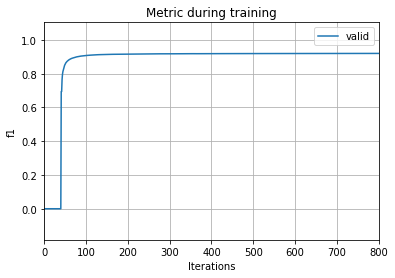

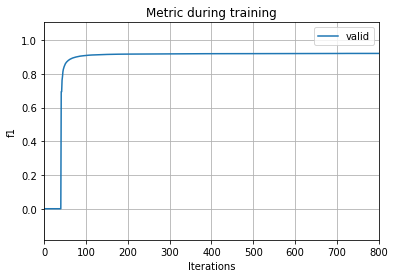

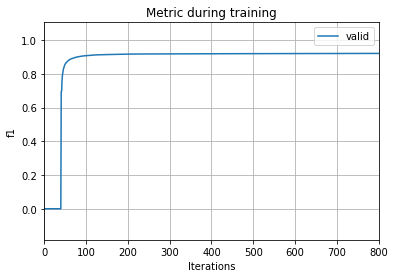

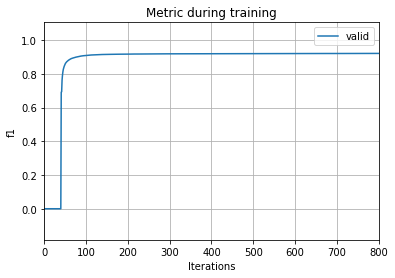

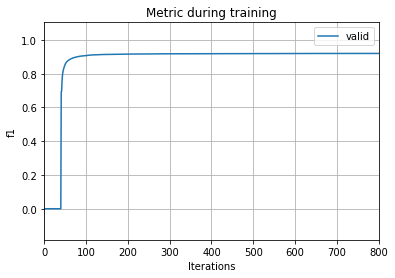

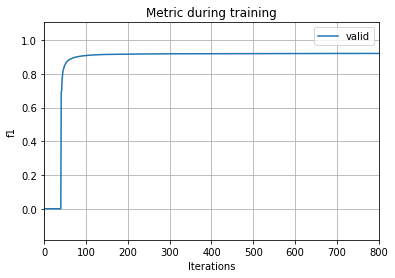

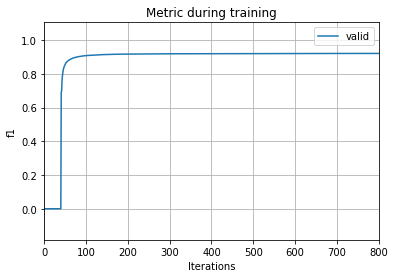

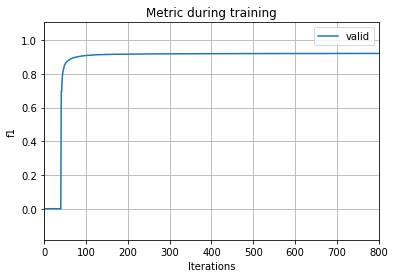

In [15]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from random import randint

# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.008,
    'num_boost_round':800,
    'num_leaves' : 1256,
    'metric': 'binary_logloss',
    'num_threads':8
    }


def lgbm_trainder(seed=0):
    
    X_train, X_val, Y_train, Y_val = train_test_split(
    x_train, y_train.y.values, test_size=0.2, random_state=seed)
    
    d_train = lgb.Dataset(X_train, label=Y_train)
    d_valid = lgb.Dataset(X_val, label=Y_val)
    
    def lgb_f1_score(y_hat, data):
        y_true = data.get_label()
        y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
        return 'f1', f1_score(y_true, y_hat), True
    
    #Learning
    evals_result = {}    
    params['seed']=seed
    clf = lgb.train(params, d_train,valid_sets=[d_valid], valid_names=['valid'],feval=lgb_f1_score,evals_result=evals_result)   
    lgb.plot_metric(evals_result, metric='f1')
    
    #Prediction
    target=list(clf.predict(x_test))
    
    return target, f1_score(Y_val,np.round(clf.predict(X_val)))

size = 8

city_lgbm_proba = []
city_lgbm_score = []


seeds = []

for i in range(size):
    s = randint(0,2**32 - 1)
    seeds.append(s)
    proba, score = lgbm_trainder(seed=s)
    city_lgbm_proba.append(proba)
    city_lgbm_score.append(score)
print(seeds)

In [19]:

lgbm=pd.DataFrame()
for i in range(size):
    lgbm[str(i)]=city_lgbm_proba[i]
lgbm.to_csv('./output/class/nxt_stage.csv',index=False)    
lgbm[:20]

,0,1,2,3,4,5,6,7
0,0.020800,0.021049,0.019489,0.017109,0.017619,0.028794,0.020385,0.018567
1,0.001856,0.002139,0.002012,0.001677,0.001781,0.002030,0.001586,0.001659
2,0.998842,0.998840,0.998842,0.998842,0.998842,0.998843,0.998843,0.998842
3,0.005105,0.005863,0.004823,0.002567,0.003712,0.007806,0.004383,0.004731
4,0.064387,0.061450,0.061021,0.080792,0.066196,0.054122,0.067174,0.038412
5,0.000498,0.000496,0.000497,0.000497,0.000497,0.000498,0.000498,0.000497
6,0.998842,0.998840,0.998842,0.998842,0.998842,0.998843,0.998843,0.998842
7,0.000498,0.000496,0.000497,0.000497,0.000497,0.000498,0.000498,0.000497
8,0.998842,0.998840,0.998842,0.998842,0.998842,0.998843,0.998843,0.998842
9,0.431087,0.284203,0.446435,0.318554,0.236747,0.412137,0.218475,0.446501


In [21]:
city=lgbm.copy()
for col in city.columns:
    city[col]=np.round(city[col].values)

city['target']=np.zeros(len(city))
for col in city.columns:
    city['target']=city['target']+city[col]

def fnc(x):
    if x>=2:
        return 1
    else:
        return 0
city=[fnc(x) for x in city.target.values]

submission= pd.DataFrame()
submission['id']=test2['trajectory_id']
submission['target'] = city
submission.to_csv('./output/submission/lgbm_blended_2.csv',index=False)    
submission[:20]

[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]